In [1]:
!sudo apt-get install -y fonts-nanum* | tail -n 1
!sudo fc-cache -fv
!rm -rf ~/.cache/matplotlib

debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 4.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Processing triggers for fontconfig (2.13.1-4.2ubuntu5) ...
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 39 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no suc

In [2]:
# 필요 라이브러리 설치

!pip install torchviz | tail -n 1

In [1]:
# 라이브러리 임포트

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display

# 폰트 관련 용도
import matplotlib.font_manager as fm

# Colab, Linux
# 나눔 고딕 폰트의 경로 명시
path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
font_name = fm.FontProperties(fname=path, size=10).get_name()

# Window
# font_name = "NanumBarunGothic"

# Mac
# font_name = "AppleGothic"

In [106]:
# 기본 폰트 설정
# plt.rcParams['font.family'] = font_name

# 기본 폰트 사이즈 변경
plt.rcParams['font.size'] = 14

# 기본 그래프 사이즈 변경
plt.rcParams['figure.figsize'] = (6,6)

# 기본 그리드 표시
# 필요에 따라 설정할 때는, plt.grid()
plt.rcParams['axes.grid'] = True
plt.rcParams["grid.linestyle"] = ":"

# 마이너스 기호 정상 출력
plt.rcParams['axes.unicode_minus'] = False

# 넘파이 부동소수점 자릿수 표시
np.set_printoptions(suppress=True, precision=4)

In [3]:
print(np.random.rand(3,4))

[[0.057  0.9181 0.9595 0.3312]
 [0.0997 0.4613 0.3744 0.4211]
 [0.0312 0.329  0.7075 0.2231]]


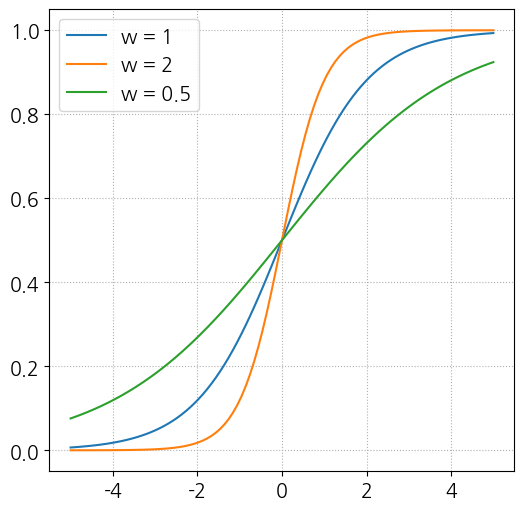

In [7]:
## Sigmoid 함수

def sigmoid(x, w=1):
  y = 1 / (1 + np.exp(-w*x))
  return y

x = np.linspace(-5, 5, 100)

y = sigmoid(x)
y1 = sigmoid(x, w=2)
y2 = sigmoid(x, w=0.5)

plt.figure(figsize=(6, 6))
plt.plot(x, y, label = "w = 1")
plt.plot(x, y1, label = "w = 2")
plt.plot(x, y2, label = "w = 0.5")
plt.legend()
plt.show()

In [1]:
import torch
print(torch.__version__)

# torch.cuda.is_available()
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

2.5.1+cu124
cpu


In [2]:
r0 = torch.tensor(10)
print("r0 = \n", r0)
print("r0 dtype = ", r0.dtype)
print("r0 shape = ", r0.shape)

r0 = 
 tensor(10)
r0 dtype =  torch.int64
r0 shape =  torch.Size([])


In [3]:
## tensor <= matrix

f0 = torch.tensor(1.0)

print("f0 = ", f0)
print("f0.dtype = ", f0.dtype)
print("f0.shape = ", f0.shape)

f0 =  tensor(1.)
f0.dtype =  torch.float32
f0.shape =  torch.Size([])


In [4]:
## Tensor 속성

print("attribute")
r1 = torch.tensor([1, 2, 3])
print("r1 = \n", r1)

r1 = r1.to(device)

print("dtype = ", r1.dtype)
print("shape = ", r1.shape)
print("device =", r1.device)

attribute
r1 = 
 tensor([1, 2, 3])
dtype =  torch.int64
shape =  torch.Size([3])
device = cpu


In [8]:
##
print(torch.cuda.is_available())
# print(torch.cuda.current_device())

print(torch.cuda.device_count())

False
0


In [13]:
## numpy -> torch casting
import numpy as np

r1_np = np.arange(1, 6)
print(r1_np)
print(r1_np.dtype)

print('*'*50)

r1 = torch.tensor(r1_np).float()
print(r1)
print(r1.dtype)
print(r1.shape)
print(r1.data.numpy())

[1 2 3 4 5]
int64
**************************************************
tensor([1., 2., 3., 4., 5.])
torch.float32
torch.Size([5])
[1. 2. 3. 4. 5.]


In [17]:
##

r2 = torch.tensor(([1, 2, 3],
                   [4, 5, 6]))
print(r2)
print("r2 dtype =", r2.dtype)
print("r2.shape =", r2.shape)
print("r2.data.numpy() = \n", r2.data.numpy())

tensor([[1, 2, 3],
        [4, 5, 6]])
r2 dtype = torch.int64
r2.shape = torch.Size([2, 3])
r2.data.numpy() = 
 [[1 2 3]
 [4 5 6]]


In [18]:
## np.randn N(0, 1)
r3 = torch.randn([3, 2, 2])

print("r3 = \n", r3)

r3 = 
 tensor([[[-0.0026,  1.9026],
         [-0.9106,  0.0599]],

        [[-0.1121,  0.6922],
         [-0.1603, -0.0378]],

        [[ 0.6032, -1.9494],
         [-0.5111,  0.0932]]])


In [20]:
## 4d, np.ones
r4 = torch.ones((2, 3, 2, 3)).int()

print("r4 = \n", r4)

r4 = 
 tensor([[[[1, 1, 1],
          [1, 1, 1]],

         [[1, 1, 1],
          [1, 1, 1]],

         [[1, 1, 1],
          [1, 1, 1]]],


        [[[1, 1, 1],
          [1, 1, 1]],

         [[1, 1, 1],
          [1, 1, 1]],

         [[1, 1, 1],
          [1, 1, 1]]]], dtype=torch.int32)


In [29]:
x1 = np.array([1, 2, 3])
y1 = torch.from_numpy(x1)

x1[0] = -1

print(x1)
print(y1)

[-1  2  3]
tensor([-1,  2,  3])


In [30]:
ones_tensor = torch.ones((2,3)).long()
print(ones_tensor)
print(ones_tensor.dtype)

tensor([[1, 1, 1],
        [1, 1, 1]])
torch.int64


In [40]:
##

r3 = torch.randn([3, 2, 2])
print("r3 = \n", r3)
print("r3 shape =", r3.shape)
print('*'*50)
print(r3.view(3, -1)) # r3.reshape
print('*'*50)
print(r3.view(-1))
print(r3.view(-1).shape)
print(r3.view(1, 12))
print(r3.view(1, 12).shape)

r3 = 
 tensor([[[ 0.0561,  0.5221],
         [-1.5092,  0.5236]],

        [[-0.3459, -0.5628],
         [-0.2089,  0.3620]],

        [[ 1.5161, -0.5113],
         [-1.0879,  0.0118]]])
r3 shape = torch.Size([3, 2, 2])
**************************************************
tensor([[ 0.0561,  0.5221, -1.5092,  0.5236],
        [-0.3459, -0.5628, -0.2089,  0.3620],
        [ 1.5161, -0.5113, -1.0879,  0.0118]])
**************************************************
tensor([ 0.0561,  0.5221, -1.5092,  0.5236, -0.3459, -0.5628, -0.2089,  0.3620,
         1.5161, -0.5113, -1.0879,  0.0118])
torch.Size([12])
tensor([[ 0.0561,  0.5221, -1.5092,  0.5236, -0.3459, -0.5628, -0.2089,  0.3620,
          1.5161, -0.5113, -1.0879,  0.0118]])
torch.Size([1, 12])


In [53]:
## tensor reshape

tensor_list = [[1, 2, 3, 5],
               [5, 6, 7, 8]]
print(tensor_list)
tensor_reshape = torch.tensor(tensor_list)
print(tensor_reshape)
print("*"*50)
print(tensor_reshape.reshape(4, 2))
print(tensor_reshape.reshape(4, -1))
print(tensor_reshape.reshape(-1, 2))
print(tensor_reshape.reshape(-1))
print(tensor_reshape.reshape(1, -1))
print("*"*50)
print(tensor_reshape.reshape(1, 4, -1))
print(tensor_reshape.reshape(1, 4, -1).shape)

[[1, 2, 3, 5], [5, 6, 7, 8]]
tensor([[1, 2, 3, 5],
        [5, 6, 7, 8]])
**************************************************
tensor([[1, 2],
        [3, 5],
        [5, 6],
        [7, 8]])
tensor([[1, 2],
        [3, 5],
        [5, 6],
        [7, 8]])
tensor([[1, 2],
        [3, 5],
        [5, 6],
        [7, 8]])
tensor([1, 2, 3, 5, 5, 6, 7, 8])
tensor([[1, 2, 3, 5, 5, 6, 7, 8]])
**************************************************
tensor([[[1, 2],
         [3, 5],
         [5, 6],
         [7, 8]]])
torch.Size([1, 4, 2])


In [61]:
## squeeze, unsqueeze
tensor_squeeze = torch.tensor([[1], [2], [3]])
print(tensor_squeeze)
print(tensor_squeeze.shape)

print(tensor_squeeze.squeeze())
print(tensor_squeeze.squeeze().shape)

print('*'*50)
tensor_squeeze2 = torch.ones(1, 2, 1, 4)
print(tensor_squeeze2)
print(tensor_squeeze2.squeeze())

tensor([[1],
        [2],
        [3]])
torch.Size([3, 1])
tensor([1, 2, 3])
torch.Size([3])
**************************************************
tensor([[[[1., 1., 1., 1.]],

         [[1., 1., 1., 1.]]]])
tensor([[1., 1., 1., 1.],
        [1., 1., 1., 1.]])


In [65]:
tensor_list = torch.tensor([[1, 2, 3, 5],
                            [5, 6, 7, 8]])
print(tensor_list)
print(tensor_list.shape)
print('*'*50)
print(tensor_list.unsqueeze(2))
print(tensor_list.unsqueeze(2).shape)

tensor([[1, 2, 3, 5],
        [5, 6, 7, 8]])
torch.Size([2, 4])
**************************************************
tensor([[[1],
         [2],
         [3],
         [5]],

        [[5],
         [6],
         [7],
         [8]]])
torch.Size([2, 4, 1])


In [70]:
print(r1)
print(r1.requires_grad)

rr = torch.tensor([1, 2, 3, 4, 5], dtype=torch.float32,
                  requires_grad=True)
print(rr)
print(rr.requires_grad)

tensor([1., 2., 3., 4., 5.])
False
tensor([1., 2., 3., 4., 5.], requires_grad=True)
True


In [81]:
## item()

tt = torch.tensor([1])
print(tt)
print(tt.requires_grad)
print("item")
print(tt.item())

accuracy = torch.rand(1)
print(accuracy)
print(f"Accuracy = {accuracy.item()*100:.3f}%")

tensor([1])
False
item
1
tensor([0.9864])
Accuracy = 98.644%


In [86]:
## summary statistic

torch.manual_seed(220)
t_stat = torch.rand((4,3))
print(t_stat)

tensor([[0.1990, 0.5036, 0.6553],
        [0.8585, 0.0986, 0.5055],
        [0.0695, 0.0353, 0.1188],
        [0.1614, 0.2083, 0.7573]])


In [92]:
## max, min, mean, median, var, std, range, q1, q1
print(t_stat.max())
print(t_stat.max(0))
print(t_stat.max(0).values)
print(t_stat.max(0).indices)
print('*'*50)
print(t_stat.max())
print(t_stat.max(1))
print(t_stat.max(1).values)
print(t_stat.max(1).indices)

tensor(0.8585)
torch.return_types.max(
values=tensor([0.8585, 0.5036, 0.7573]),
indices=tensor([1, 0, 3]))
tensor([0.8585, 0.5036, 0.7573])
tensor([1, 0, 3])
**************************************************
tensor(0.8585)
torch.return_types.max(
values=tensor([0.6553, 0.8585, 0.1188, 0.7573]),
indices=tensor([2, 0, 2, 2]))
tensor([0.6553, 0.8585, 0.1188, 0.7573])
tensor([2, 0, 2, 2])


In [95]:
tensor_stat = torch.tensor([[1, 3, 5], [2, 4, 6]], dtype=torch.float32)
print(tensor_stat)

print("sum")
print(tensor_stat.sum())

tensor([[1., 3., 5.],
        [2., 4., 6.]])
sum
tensor(21.)


In [102]:
## 2차 함수의 계산
## y = 2*x^2 + 2

x_np = np.arange(-2, 2.1 ,0.25)
print(x_np)
x = torch.tensor(x_np, requires_grad=True)
print(x)

y = 2*x**2 + 2
print("y =\n", y)

[-2.   -1.75 -1.5  -1.25 -1.   -0.75 -0.5  -0.25  0.    0.25  0.5   0.75
  1.    1.25  1.5   1.75  2.  ]
tensor([-2.0000, -1.7500, -1.5000, -1.2500, -1.0000, -0.7500, -0.5000, -0.2500,
         0.0000,  0.2500,  0.5000,  0.7500,  1.0000,  1.2500,  1.5000,  1.7500,
         2.0000], dtype=torch.float64, requires_grad=True)
y =
 tensor([10.0000,  8.1250,  6.5000,  5.1250,  4.0000,  3.1250,  2.5000,  2.1250,
         2.0000,  2.1250,  2.5000,  3.1250,  4.0000,  5.1250,  6.5000,  8.1250,
        10.0000], dtype=torch.float64, grad_fn=<AddBackward0>)


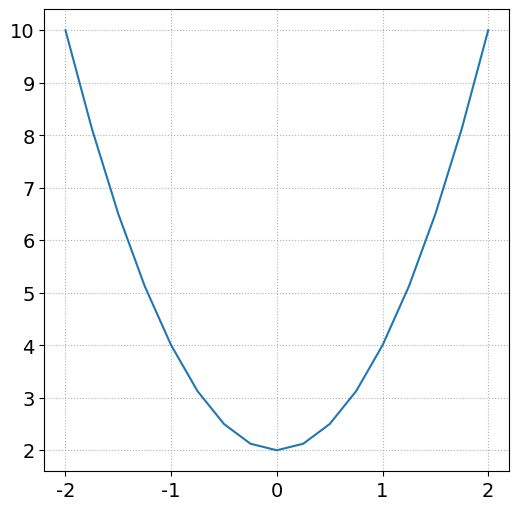

In [107]:
import matplotlib.pyplot as plt

plt.plot(x.data, y.data)
plt.show()

In [109]:
##
x_np = np.arange(-2, 2.1 ,0.25)
x = torch.tensor(x_np, requires_grad=True)

y = 2*x**2 + 2
print(y)

z = y.sum()
print("z =", z)

tensor([10.0000,  8.1250,  6.5000,  5.1250,  4.0000,  3.1250,  2.5000,  2.1250,
         2.0000,  2.1250,  2.5000,  3.1250,  4.0000,  5.1250,  6.5000,  8.1250,
        10.0000], dtype=torch.float64, grad_fn=<AddBackward0>)
z = tensor(85., dtype=torch.float64, grad_fn=<SumBackward0>)


In [111]:
!pip install torchviz

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 43.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 37.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 47.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 820.8 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 10.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 107.0 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjit

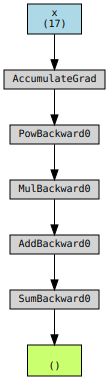

In [112]:
from torchviz import make_dot
g = make_dot(z, params = {"x":x})
display(g)

In [113]:
z.backward()

In [114]:
print(x.grad)

tensor([-8., -7., -6., -5., -4., -3., -2., -1.,  0.,  1.,  2.,  3.,  4.,  5.,
         6.,  7.,  8.], dtype=torch.float64)


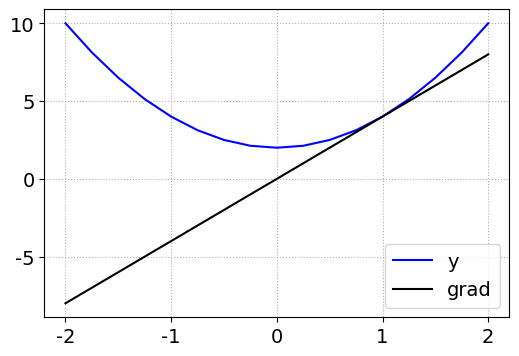

In [119]:
plt.figure(figsize=(6,4))
plt.plot(x.data, y.data, c = 'b', label='y')
plt.plot(x.data, x.grad.data, c='k', label='grad')
plt.legend()
plt.show()

In [122]:
y = 2*x**2 + 2
z = y.sum()
x.grad.zero_() # 0으로 초기화
z.backward()
print(x.grad)

tensor([-8., -7., -6., -5., -4., -3., -2., -1.,  0.,  1.,  2.,  3.,  4.,  5.,
         6.,  7.,  8.], dtype=torch.float64)


In [123]:
print(x.grad.zero_())

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       dtype=torch.float64)
